In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# configure df options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

pd.options.display.float_format = '{:,.5f}'.format

%matplotlib inline

#### Bottom value: used for missing measurements to avoid zero in 'multiplicative' model of seasonal decompression

In [3]:
bottom_value = 0.01

### Read in cleaned dataset

In [4]:
df = pd.read_csv('../../dataset/final/bentre-cleaned.csv', parse_dates=['date'])

In [5]:
# set index to time-series based 'date'
df.set_index('date', inplace=True)

In [6]:
df.index

DatetimeIndex(['2002-01-01', '2002-01-01', '2002-01-01', '2002-01-01',
               '2002-01-01', '2002-01-02', '2002-01-02', '2002-01-02',
               '2002-01-02', '2002-01-02',
               ...
               '2018-05-31', '2018-05-31', '2018-05-31', '2018-05-31',
               '2018-05-31', '2018-05-31', '2018-05-31', '2018-05-31',
               '2018-05-31', '2018-05-31'],
              dtype='datetime64[ns]', name='date', length=15106, freq=None)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15106 entries, 2002-01-01 to 2018-05-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    15106 non-null  object 
 1   min     15010 non-null  float64
 2   max     15106 non-null  float64
 3   x       13596 non-null  float64
 4   y       13596 non-null  float64
 5   cm      13596 non-null  float64
dtypes: float64(5), object(1)
memory usage: 826.1+ KB


In [8]:
# sort by date index
df.sort_index(inplace=True)

df.head(20)

,code,min,max,x,y,cm
date,,,,,,
2002-01-01,ANTHUAN,3.50000,6.00000,106.57215,9.99752,0.00000
2002-01-01,LOCTHUAN,0.00000,0.00000,106.59743,10.24030,274.32000
2002-01-01,SONDOC,0.10000,0.30000,106.52635,10.02522,30.48000
2002-01-01,BENTRAI,0.20000,1.00000,106.53715,9.87584,0.00000
2002-01-01,BINHDAI,0.50000,2.00000,106.69681,10.20635,152.40000
2002-01-02,ANTHUAN,3.00000,5.50000,106.57215,9.99752,0.00000
2002-01-02,LOCTHUAN,0.00000,0.00000,106.59743,10.24030,274.32000
2002-01-02,BINHDAI,1.00000,3.00000,106.69681,10.20635,152.40000
2002-01-02,BENTRAI,0.10000,1.00000,106.53715,9.87584,0.00000


In [9]:
# replace zeros with bottom_value
df[['min', 'max']] = df[['min', 'max']].replace(0.0, bottom_value)

df.tail(20)

,code,min,max,x,y,cm
date,,,,,,
2018-05-30,CAIMIT,0.20000,0.20000,106.42994,10.10224,365.76000
2018-05-30,TANTHIENG,0.01000,0.01000,106.21894,10.15931,518.16000
2018-05-30,CONGNANGAM,0.01000,0.01000,nan,nan,nan
2018-05-30,CAMSON,0.25000,0.40000,106.34840,10.02140,579.12000
2018-05-30,SONPHU,0.01000,0.01000,106.38150,10.17611,731.52000
2018-05-31,MYTHANH,0.01000,0.01000,106.32674,10.24610,701.04000
2018-05-31,THANHTHOIA,0.10000,0.10000,106.30836,10.04766,0.00000
2018-05-31,CAMSON,0.30000,0.45000,106.34840,10.02140,579.12000
2018-05-31,TICHTHIEN,0.01000,0.01000,nan,nan,nan


### Experiment: Filling missing dates and interpolating measurements  (JUMP TO IMPLEMENTATION)
One year worth samples at a specific station 

In [10]:
station_code = 'BINHDAI'
station_year = 2012

In [11]:
# only need 'code', 'min' and 'max' columns since we are analyzing by one station at a time
sdf = df[(df['code'] == station_code) & (df.index.year == station_year)][['code', 'min', 'max']]

sdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 2012-02-01 to 2012-06-29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    63 non-null     object 
 1   min     63 non-null     float64
 2   max     63 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB


In [12]:
sdf.head(10)

,code,min,max
date,,,
2012-02-01,BINHDAI,0.77500,11.25000
2012-02-02,BINHDAI,0.92500,14.67500
2012-02-03,BINHDAI,2.12500,16.37500
2012-02-09,BINHDAI,3.80000,16.30000
2012-02-10,BINHDAI,3.40000,17.87500
2012-02-11,BINHDAI,2.57500,17.77500
2012-02-15,BINHDAI,1.02500,11.70000
2012-02-16,BINHDAI,0.97500,11.37500
2012-02-17,BINHDAI,2.62500,17.62500


In [13]:
min_date = sdf.index.min()

min_date

Timestamp('2012-02-01 00:00:00')

In [14]:
max_date = sdf.index.max()

max_date

Timestamp('2012-06-29 00:00:00')

#### Fill missing dates from the beginning of the year to last entry of the dataset

In [15]:
start_date = f'{station_year}-01-01'
end_date = max_date + pd.DateOffset(1)  # add one extra day as the upper limit for forward fill in interpolate

In [16]:
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

date_range

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-06-21', '2012-06-22', '2012-06-23', '2012-06-24',
               '2012-06-25', '2012-06-26', '2012-06-27', '2012-06-28',
               '2012-06-29', '2012-06-30'],
              dtype='datetime64[ns]', length=182, freq='D')

In [17]:
#sdf.set_index('date', inplace=True)  # no need since 'date' is already index
tdf = sdf.reindex(date_range).fillna(np.nan).rename_axis('date').reset_index()

In [18]:
# assign station code to new rows
tdf['code'] = station_code

In [19]:
# set lower limit if it does not have value for forward fill in interpolate
if np.isnan(tdf.at[0, 'min']):
    tdf.at[0, 'min'] = bottom_value
        
if np.isnan(tdf.at[0, 'max']):
    tdf.at[0, 'max'] = bottom_value
        
# use the extra day as the upper limit for forward fill in interpolate
tdf.at[tdf.index[-1], ['min', 'max']] = bottom_value

In [20]:
tdf.head(40)

,date,code,min,max
0,2012-01-01,BINHDAI,0.01000,0.01000
1,2012-01-02,BINHDAI,nan,nan
2,2012-01-03,BINHDAI,nan,nan
3,2012-01-04,BINHDAI,nan,nan
4,2012-01-05,BINHDAI,nan,nan
5,2012-01-06,BINHDAI,nan,nan
6,2012-01-07,BINHDAI,nan,nan
7,2012-01-08,BINHDAI,nan,nan
8,2012-01-09,BINHDAI,nan,nan
9,2012-01-10,BINHDAI,nan,nan


In [21]:
tdf.tail(20)

,date,code,min,max
162,2012-06-11,BINHDAI,nan,nan
163,2012-06-12,BINHDAI,1.52500,13.07500
164,2012-06-13,BINHDAI,1.82500,17.02500
165,2012-06-14,BINHDAI,3.05000,15.92500
166,2012-06-15,BINHDAI,nan,nan
167,2012-06-16,BINHDAI,nan,nan
168,2012-06-17,BINHDAI,nan,nan
169,2012-06-18,BINHDAI,nan,nan
170,2012-06-19,BINHDAI,nan,nan
171,2012-06-20,BINHDAI,nan,nan


In [22]:
# make 'date' as DateTimeIndex again
tdf = tdf.set_index('date')

tdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 182 entries, 2012-01-01 to 2012-06-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    182 non-null    object 
 1   min     65 non-null     float64
 2   max     65 non-null     float64
dtypes: float64(2), object(1)
memory usage: 5.7+ KB


#### Interpolating missing measurements

In [23]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html
# method: linear, time, quadratic, pchip, akima
tdf.interpolate(method ='time', limit_direction ='forward', inplace=True)

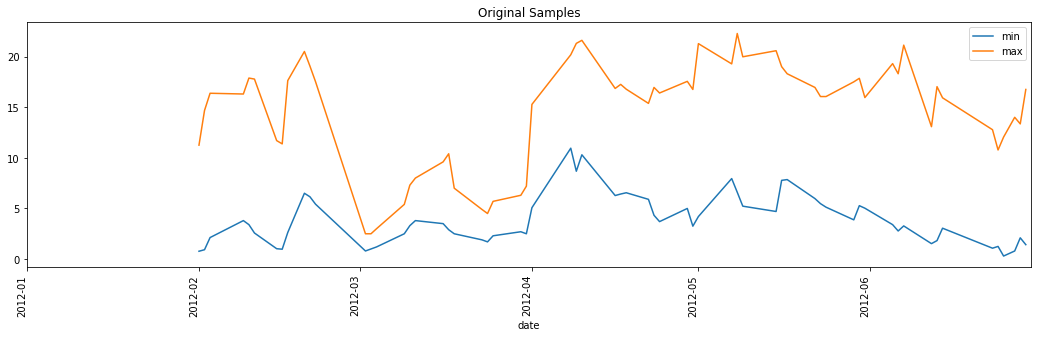

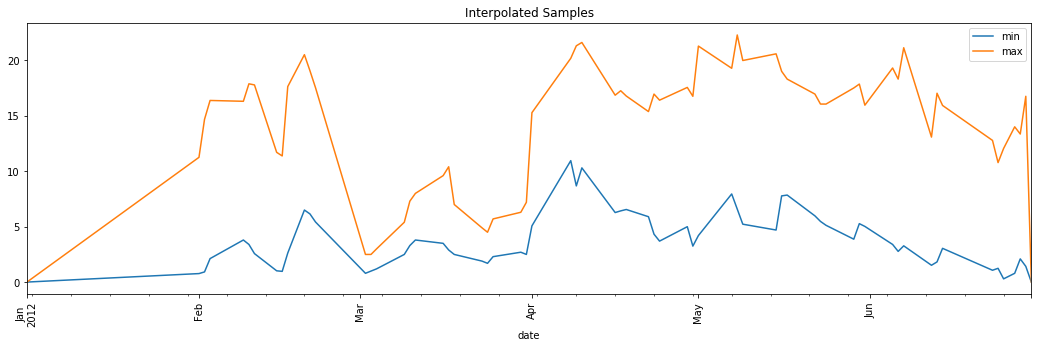

In [24]:
sdf.plot(title='Original Samples', xlim=[tdf.index.date.min(), tdf.index.date.max()], rot=90, figsize=(18, 5))
tdf.plot(title='Interpolated Samples', rot=90, figsize=(18, 5));

#### Fill missing dates from last entry of the dataset till the end of the year

In [25]:
start_date = end_date + pd.DateOffset(1)
end_date = f'{station_year}-12-31'

In [26]:
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

date_range

DatetimeIndex(['2012-07-01', '2012-07-02', '2012-07-03', '2012-07-04',
               '2012-07-05', '2012-07-06', '2012-07-07', '2012-07-08',
               '2012-07-09', '2012-07-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', length=184, freq='D')

bottom value is used as the filler

In [27]:
edf = pd.DataFrame({ 'code': station_code, 'min': bottom_value, 'max': bottom_value }, index=date_range)

edf.head()

,code,min,max
2012-07-01,BINHDAI,0.01000,0.01000
2012-07-02,BINHDAI,0.01000,0.01000
2012-07-03,BINHDAI,0.01000,0.01000
2012-07-04,BINHDAI,0.01000,0.01000
2012-07-05,BINHDAI,0.01000,0.01000


In [28]:
edf.tail()

,code,min,max
2012-12-27,BINHDAI,0.01000,0.01000
2012-12-28,BINHDAI,0.01000,0.01000
2012-12-29,BINHDAI,0.01000,0.01000
2012-12-30,BINHDAI,0.01000,0.01000
2012-12-31,BINHDAI,0.01000,0.01000


In [29]:
# combine 2 halves of the year back to original station dataframe
sdf = pd.concat([tdf, edf])

sdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2012-01-01 to 2012-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    366 non-null    object 
 1   min     366 non-null    float64
 2   max     366 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.4+ KB


In [30]:
# make sure frequent is on daily basis
sdf.index.freq = 'D'

sdf.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [31]:
sdf.head(40)

,code,min,max
2012-01-01,BINHDAI,0.01000,0.01000
2012-01-02,BINHDAI,0.03468,0.37258
2012-01-03,BINHDAI,0.05935,0.73516
2012-01-04,BINHDAI,0.08403,1.09774
2012-01-05,BINHDAI,0.10871,1.46032
2012-01-06,BINHDAI,0.13339,1.82290
2012-01-07,BINHDAI,0.15806,2.18548
2012-01-08,BINHDAI,0.18274,2.54806
2012-01-09,BINHDAI,0.20742,2.91065
2012-01-10,BINHDAI,0.23210,3.27323


In [32]:
sdf.tail()

,code,min,max
2012-12-27,BINHDAI,0.01000,0.01000
2012-12-28,BINHDAI,0.01000,0.01000
2012-12-29,BINHDAI,0.01000,0.01000
2012-12-30,BINHDAI,0.01000,0.01000
2012-12-31,BINHDAI,0.01000,0.01000


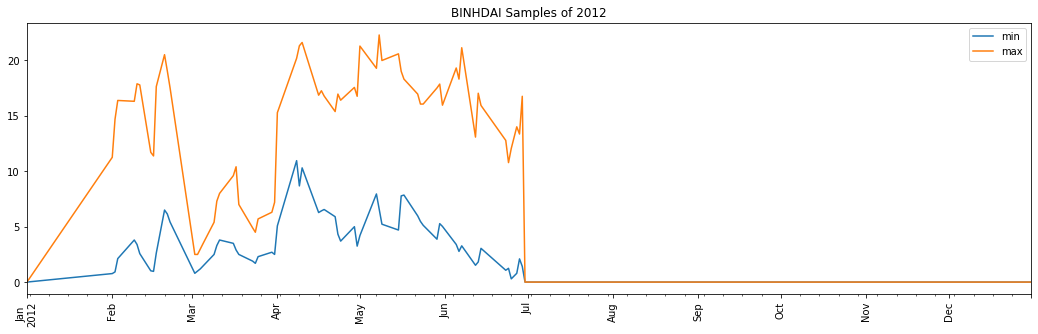

In [33]:
sdf.plot(title=f'{station_code} Samples of {station_year}', rot=90, figsize=(18, 5));

### Implementation: Filling missing dates and interpolating measurements  
All years worth samples at each station 

In [34]:
# get all station codes
station_codes = df['code'].unique()

station_codes

array(['ANTHUAN', 'LOCTHUAN', 'SONDOC', 'BENTRAI', 'BINHDAI', 'GIAOHOA',
       'MYHOA', 'HUONGMY', 'PHUOCLONG', 'VANGQUOITAY', 'CAIHOP',
       'TIENTHUY', 'TANTHIENG', 'TICHTHIEN', 'MYVAN', 'BENCHUA', 'MOCAY',
       'TRACU', 'LANGTHE', 'RACHRUM', 'CAMSON', 'HUNGKHANHTRUNGB',
       'CONGNANGAM', 'CAIMIT', 'THANHTHOIA', 'MYTHANH', 'SONPHU',
       'VUNGLIEM'], dtype=object)

In [35]:
def fill_interpolate(data, code, year):
    min_date = data.index.min()
    max_date = data.index.max()
    
    # no annual data
    if pd.isnull(min_date) and pd.isnull(max_date):
        return pd.DataFrame({ 'code': code, 'min': bottom_value, 'max': bottom_value }, index=pd.date_range(f'{year}-01-01', f'{year}-12-31', freq='D'))
    
    # fill missing dates from the beginning of the year to last entry of the dataset
    start_date = f'{year}-01-01'
    end_date = max_date + pd.DateOffset(1)  # add one extra day as the upper limit for forward fill in interpolate
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    
    data = data.reindex(date_range).fillna(np.nan).rename_axis('date').reset_index()

    data['code'] = code
    
    if np.isnan(data.at[0, 'min']):  # set lower limit
        data.at[0, 'min'] = bottom_value
        
    if np.isnan(data.at[0, 'max']):
        data.at[0, 'max'] = bottom_value
        
    data.at[data.index[-1], ['min', 'max']] = bottom_value  # use the extra day as the upper limit for forward fill in interpolate
    
    # make 'date' as DateTimeIndex again
    data = data.set_index('date')
    
    # fill missing measurements for those newly inserted dates
    data = data.interpolate(method ='time', limit_direction ='forward')
    
    # fill missing dates from last entry of the dataset till the end of the year
    start_date = end_date + pd.DateOffset(1)
    end_date = f'{year}-12-31'
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    
    return pd.concat([data, pd.DataFrame({ 'code': code, 'min': bottom_value, 'max': bottom_value }, index=date_range)])

In [36]:
start_year = 2002
end_year = 2018

for station_code in station_codes:
    # filter samples for this station
    sdf = df[df['code'] == station_code][['code', 'min', 'max']]

    station_years = sdf.index.year.unique().to_numpy()
    print(f'Station {station_code} has samples on these years: {station_years}')
    
    new_sdf = pd.DataFrame()
    for station_year in range(start_year, end_year + 1):
        print(f'Processing station {station_code} on year {station_year}')
        
        if new_sdf.empty:
            new_sdf = fill_interpolate(sdf[sdf.index.year == station_year], station_code, station_year)
        else:
            new_sdf = pd.concat([new_sdf, fill_interpolate(sdf[sdf.index.year == station_year], station_code, station_year)])
        
    # save to csv file
    new_sdf.index.freq = 'D'  # make sure the frequency is daily
    new_sdf.to_csv(f'../../dataset/final/stations/{station_code}.csv', index=True, index_label='date')

Station ANTHUAN has samples on these years: [2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016]
Processing station ANTHUAN on year 2002
Processing station ANTHUAN on year 2003
Processing station ANTHUAN on year 2004
Processing station ANTHUAN on year 2005
Processing station ANTHUAN on year 2006
Processing station ANTHUAN on year 2007
Processing station ANTHUAN on year 2008
Processing station ANTHUAN on year 2009
Processing station ANTHUAN on year 2010
Processing station ANTHUAN on year 2011
Processing station ANTHUAN on year 2012
Processing station ANTHUAN on year 2013
Processing station ANTHUAN on year 2014
Processing station ANTHUAN on year 2015
Processing station ANTHUAN on year 2016
Processing station ANTHUAN on year 2017
Processing station ANTHUAN on year 2018
Station LOCTHUAN has samples on these years: [2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2015 2016
 2018]
Processing station LOCTHUAN on year 2002
Processing station LOCTHUAN on yea

Station TIENTHUY has samples on these years: [2017 2018]
Processing station TIENTHUY on year 2002
Processing station TIENTHUY on year 2003
Processing station TIENTHUY on year 2004
Processing station TIENTHUY on year 2005
Processing station TIENTHUY on year 2006
Processing station TIENTHUY on year 2007
Processing station TIENTHUY on year 2008
Processing station TIENTHUY on year 2009
Processing station TIENTHUY on year 2010
Processing station TIENTHUY on year 2011
Processing station TIENTHUY on year 2012
Processing station TIENTHUY on year 2013
Processing station TIENTHUY on year 2014
Processing station TIENTHUY on year 2015
Processing station TIENTHUY on year 2016
Processing station TIENTHUY on year 2017
Processing station TIENTHUY on year 2018
Station TANTHIENG has samples on these years: [2017 2018]
Processing station TANTHIENG on year 2002
Processing station TANTHIENG on year 2003
Processing station TANTHIENG on year 2004
Processing station TANTHIENG on year 2005
Processing station T

Station CAIMIT has samples on these years: [2018]
Processing station CAIMIT on year 2002
Processing station CAIMIT on year 2003
Processing station CAIMIT on year 2004
Processing station CAIMIT on year 2005
Processing station CAIMIT on year 2006
Processing station CAIMIT on year 2007
Processing station CAIMIT on year 2008
Processing station CAIMIT on year 2009
Processing station CAIMIT on year 2010
Processing station CAIMIT on year 2011
Processing station CAIMIT on year 2012
Processing station CAIMIT on year 2013
Processing station CAIMIT on year 2014
Processing station CAIMIT on year 2015
Processing station CAIMIT on year 2016
Processing station CAIMIT on year 2017
Processing station CAIMIT on year 2018
Station THANHTHOIA has samples on these years: [2018]
Processing station THANHTHOIA on year 2002
Processing station THANHTHOIA on year 2003
Processing station THANHTHOIA on year 2004
Processing station THANHTHOIA on year 2005
Processing station THANHTHOIA on year 2006
Processing station